# **Project Stage I: Data and Project Understanding**
## Enrichment Datasets for COVID-19  - ACS Social, Economic, and Housing

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [4]:
Covid19DF = pd.read_csv("..\\..\\Data\\US_Covid_19_Dataset.csv",parse_dates=['ReportDate'], index_col = "ReportDate")
Covid19DF['Population']=Covid19DF['Population'].astype('Int64')
Covid19DF

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,,
2020-01-22,1,AL,Alabama,0,Statewide Unallocated,0,0,0
2020-01-22,1,AL,Alabama,1001,Autauga County,0,0,55869
2020-01-22,1,AL,Alabama,1003,Baldwin County,0,0,223234
2020-01-22,1,AL,Alabama,1005,Barbour County,0,0,24686
2020-01-22,1,AL,Alabama,1007,Bibb County,0,0,22394
...,...,...,...,...,...,...,...,...
2022-02-10,56,WY,Wyoming,56037,Sweetwater County,10685,119,42343
2022-02-10,56,WY,Wyoming,56039,Teton County,9502,15,23464
2022-02-10,56,WY,Wyoming,56041,Uinta County,5539,36,20226


In [7]:
Covid19CADF = Covid19DF[Covid19DF['State'] == 'CA'].sort_values(by='ReportDate', ascending=False)
Covid19CADF

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,,
2022-02-10,6,CA,California,6115,Yuba County,15187,79,78668
2022-02-10,6,CA,California,6057,Nevada County,15442,119,99755
2022-02-10,6,CA,California,6053,Monterey County,74505,670,434061
2022-02-10,6,CA,California,6051,Mono County,2939,5,14444
2022-02-10,6,CA,California,6049,Modoc County,691,6,8841
...,...,...,...,...,...,...,...,...
2020-01-22,6,CA,California,6071,San Bernardino County,76,0,2180085
2020-01-22,6,CA,California,6069,San Benito County,4,0,62808
2020-01-22,6,CA,California,6067,Sacramento County,1,0,1552058


In [9]:
date_list = ['2/3/2022', '2/10/2022']
date_list = pd.to_datetime(date_list)
date_list

mask = (Covid19DF.index >= date_list[0]) & (Covid19DF.index <= date_list[1])
covid_last_week=Covid19DF.loc[mask]
mask = covid_last_week['State'] == 'CA'
covid_last_week=covid_last_week.loc[mask]
covid_last_week

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,,
2022-02-03,6,CA,California,0,Statewide Unallocated,7038,3,0
2022-02-03,6,CA,California,6001,Alameda County,235751,1635,1671329
2022-02-03,6,CA,California,6003,Alpine County,124,0,1129
2022-02-03,6,CA,California,6005,Amador County,7857,71,39752
2022-02-03,6,CA,California,6007,Butte County,30737,354,219186
...,...,...,...,...,...,...,...,...
2022-02-10,6,CA,California,6107,Tulare County,100070,1257,466195
2022-02-10,6,CA,California,6109,Tuolumne County,11703,90,54478
2022-02-10,6,CA,California,6111,Ventura County,168266,1310,846006


In [10]:
CovidCADF = covid_last_week.copy()
CovidCADF = CovidCADF[['ConfirmCasesCount', 'DeathCount']]
CovidCADF = CovidCADF.reset_index()

CovidCAAggDF = CovidCADF[['ConfirmCasesCount', 'DeathCount']].groupby(CovidCADF['ReportDate']).sum()  #sum of cases grouped by date
CovidCAAggDF

,ConfirmCasesCount,DeathCount
ReportDate,,
2022-02-03,8005751,79719
2022-02-04,8067176,80225
2022-02-05,8118735,80356
2022-02-06,8159238,80599
2022-02-07,8170356,80776
2022-02-08,8179312,80784
2022-02-09,8180551,80786
2022-02-10,8180551,80786


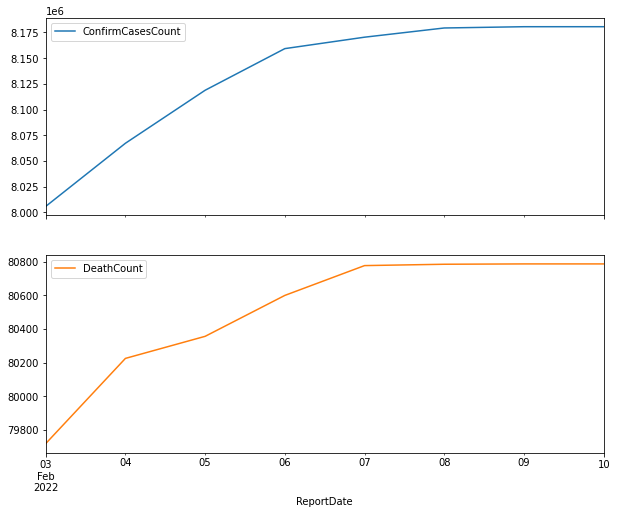

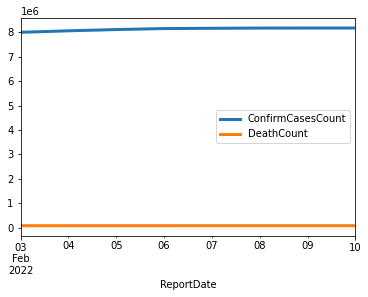

In [12]:
CovidCAAggDF.plot(subplots=True, figsize=(10,8), label='actual')
CovidCAAggDF.plot(label='Total CA Cases Count', lw=3)
plt.legend()

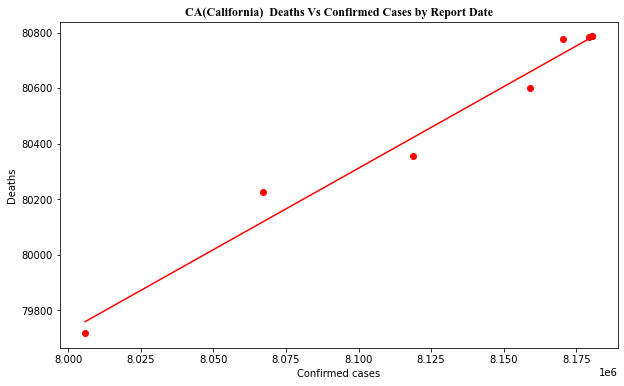

In [14]:
plt.figure(figsize=(10,6))
plt.scatter('ConfirmCasesCount','DeathCount',  data = CovidCAAggDF, c = 'r')
plt.title("CA(California)  Deaths Vs Confirmed Cases by Report Date", fontname="Times New Roman", size=12,fontweight="bold")
plt.xlabel('Confirmed cases')
plt.ylabel('Deaths')
#obtain m (slope) and b(intercept) of linear regression line
x= CovidCAAggDF.ConfirmCasesCount
y= CovidCAAggDF.DeathCount
m, b = np.polyfit(x, y, 1)
#use red as color for regression line
plt.plot(x, m*x+b, color='red')
plt.show()

C:\Users\balam\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


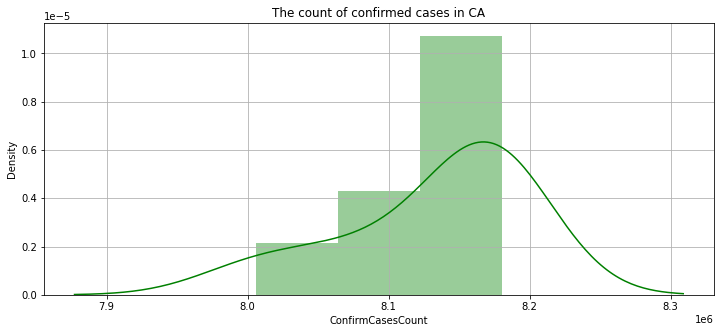

In [15]:
# Count of confirmed cases in Texas 
plt.figure(figsize=(12,5))
plt.title("The count of confirmed cases in CA")
ax = sns.distplot(CovidCAAggDF["ConfirmCasesCount"], color = 'g')
plt.grid()

In [16]:
covid_last_week.sort_values(by='ConfirmCasesCount', ascending=False).head(5)

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,,
2022-02-09,6,CA,California,6037,Los Angeles County,2611378,29259,10039107
2022-02-10,6,CA,California,6037,Los Angeles County,2611378,29259,10039107
2022-02-08,6,CA,California,6037,Los Angeles County,2611361,29259,10039107
2022-02-07,6,CA,California,6037,Los Angeles County,2611127,29256,10039107
2022-02-06,6,CA,California,6037,Los Angeles County,2610170,29243,10039107


In [17]:
covid_last_week.sort_values(by='DeathCount', ascending=False).head(5)

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population
ReportDate,,,,,,,,
2022-02-10,6,CA,California,6037,Los Angeles County,2611378,29259,10039107
2022-02-08,6,CA,California,6037,Los Angeles County,2611361,29259,10039107
2022-02-09,6,CA,California,6037,Los Angeles County,2611378,29259,10039107
2022-02-07,6,CA,California,6037,Los Angeles County,2611127,29256,10039107
2022-02-06,6,CA,California,6037,Los Angeles County,2610170,29243,10039107


In [20]:
SocialEconomicDF = pd.read_csv("..\\..\\Data\\ACS_Social_Economic_and_Housing.csv", low_memory=False, header=1)
SocialEconomicDF

,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Percent!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,id,Geographic Area Name
0,43953,259,43953,(X),25908,671,58.9,1.5,25458,689,...,(X),(X),13.8,2.2,(X),(X),23.1,3.4,0500000US01001,"Autauga County, Alabama"
1,172297,329,172297,(X),99495,1720,57.7,1.0,99317,1737,...,(X),(X),8.0,1.0,(X),(X),21.9,2.2,0500000US01003,"Baldwin County, Alabama"
2,20636,101,20636,(X),9262,444,44.9,2.1,9262,444,...,(X),(X),29.5,2.7,(X),(X),36.3,5.6,0500000US01005,"Barbour County, Alabama"
3,18492,140,18492,(X),9046,567,48.9,3.0,9046,567,...,(X),(X),16.1,5.1,(X),(X),31.6,6.8,0500000US01007,"Bibb County, Alabama"
4,45907,152,45907,(X),22715,725,49.5,1.6,22680,724,...,(X),(X),11.0,1.9,(X),(X),30.2,4.3,0500000US01009,"Blount County, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,43310,174,43310,(X),18081,663,41.7,1.5,18062,662,...,(X),(X),41.9,3.0,(X),(X),62.8,3.7,0500000US72145,"Vega Baja Municipio, Puerto Rico"
3216,6984,62,6984,(X),2667,491,38.2,7.1,2667,491,...,(X),(X),46.0,10.4,(X),(X),45.3,10.8,0500000US72147,"Vieques Municipio, Puerto Rico"
3217,18325,90,18325,(X),8442,411,46.1,2.3,8420,418,...,(X),(X),45.2,4.4,(X),(X),63.2,6.2,0500000US72149,"Villalba Municipio, Puerto Rico"
3218,27816,170,27816,(X),10761,697,38.7,2.5,10731,693,...,(X),(X),50.4,4.5,(X),(X),66.7,5.2,0500000US72151,"Yabucoa Municipio, Puerto Rico"


In [21]:
SocialEconomicDF[['CountyName', 'StateName']] = SocialEconomicDF['Geographic Area Name'].str.split(',', expand=True)
SocialEconomicDF = SocialEconomicDF.rename(columns={'Estimate!!SEX AND AGE!!Total population': 'Estimated Population', 
                          'Estimate!!SEX AND AGE!!Total population!!Under 5 years' : 'Under 5 years', 
                          "Estimate!!SEX AND AGE!!Total population!!5 to 9 years" :  '5 to 9 years',
                          "Estimate!!SEX AND AGE!!Total population!!10 to 14 years" : '10 to 14 years',
                          "Estimate!!SEX AND AGE!!Total population!!15 to 19 years" : '15 to 19 years',
                          "Estimate!!SEX AND AGE!!Total population!!20 to 24 years" : '20 to 24 years', 
                          "Estimate!!SEX AND AGE!!Total population!!25 to 34 years" : '25 to 34 years',
                          "Estimate!!SEX AND AGE!!Total population!!35 to 44 years" : '35 to 44 years',
                          "Estimate!!SEX AND AGE!!Total population!!45 to 54 years" : '45 to 54 years',
                          "Estimate!!SEX AND AGE!!Total population!!55 to 59 years" : '55 to 59 years',
                          "Estimate!!SEX AND AGE!!Total population!!60 to 64 years" : '60 to 64 years',
                          "Estimate!!SEX AND AGE!!Total population!!65 to 74 years" : '65 to 74 years',
                          "Estimate!!SEX AND AGE!!Total population!!75 to 84 years" : '75 to 84 years',
                          "Estimate!!SEX AND AGE!!Total population!!85 years and over" : '85 years and over'
                        })
SocialEconomicDF

,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Percent!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,...,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,id,Geographic Area Name,CountyName,StateName
0,43953,259,43953,(X),25908,671,58.9,1.5,25458,689,...,13.8,2.2,(X),(X),23.1,3.4,0500000US01001,"Autauga County, Alabama",Autauga County,Alabama
1,172297,329,172297,(X),99495,1720,57.7,1.0,99317,1737,...,8.0,1.0,(X),(X),21.9,2.2,0500000US01003,"Baldwin County, Alabama",Baldwin County,Alabama
2,20636,101,20636,(X),9262,444,44.9,2.1,9262,444,...,29.5,2.7,(X),(X),36.3,5.6,0500000US01005,"Barbour County, Alabama",Barbour County,Alabama
3,18492,140,18492,(X),9046,567,48.9,3.0,9046,567,...,16.1,5.1,(X),(X),31.6,6.8,0500000US01007,"Bibb County, Alabama",Bibb County,Alabama
4,45907,152,45907,(X),22715,725,49.5,1.6,22680,724,...,11.0,1.9,(X),(X),30.2,4.3,0500000US01009,"Blount County, Alabama",Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,43310,174,43310,(X),18081,663,41.7,1.5,18062,662,...,41.9,3.0,(X),(X),62.8,3.7,0500000US72145,"Vega Baja Municipio, Puerto Rico",Vega Baja Municipio,Puerto Rico
3216,6984,62,6984,(X),2667,491,38.2,7.1,2667,491,...,46.0,10.4,(X),(X),45.3,10.8,0500000US72147,"Vieques Municipio, Puerto Rico",Vieques Municipio,Puerto Rico
3217,18325,90,18325,(X),8442,411,46.1,2.3,8420,418,...,45.2,4.4,(X),(X),63.2,6.2,0500000US72149,"Villalba Municipio, Puerto Rico",Villalba Municipio,Puerto Rico
3218,27816,170,27816,(X),10761,697,38.7,2.5,10731,693,...,50.4,4.5,(X),(X),66.7,5.2,0500000US72151,"Yabucoa Municipio, Puerto Rico",Yabucoa Municipio,Puerto Rico


In [22]:
JoinKeys = ['StateName', 'CountyName']
SocialEconomicDF['StateName'] = SocialEconomicDF["StateName"].str.strip()
SocialEconomicDF['CountyName'] = SocialEconomicDF["CountyName"].str.strip()
Covid19CASocialEcoDF = pd.merge(Covid19CADF, SocialEconomicDF, on=JoinKeys, how='left')
Covid19CASocialEcoDF.head()

,StateFIPS,State,StateName,CountyFIPS,CountyName,ConfirmCasesCount,DeathCount,Population,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,...,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Estimate!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,id,Geographic Area Name
0,6,CA,California,6115,Yuba County,15187,79,78668,57263.0,252.0,...,(X),(X),12.3,1.9,(X),(X),31.1,3.3,0500000US06115,"Yuba County, California"
1,6,CA,California,6057,Nevada County,15442,119,99755,84376.0,220.0,...,(X),(X),6.8,1.4,(X),(X),25.0,2.3,0500000US06057,"Nevada County, California"
2,6,CA,California,6053,Monterey County,74505,670,434061,331873.0,433.0,...,(X),(X),11.1,0.8,(X),(X),24.0,1.3,0500000US06053,"Monterey County, California"
3,6,CA,California,6051,Mono County,2939,5,14444,11974.0,196.0,...,(X),(X),8.3,5.2,(X),(X),19.4,6.6,0500000US06051,"Mono County, California"
4,6,CA,California,6049,Modoc County,691,6,8841,7365.0,62.0,...,(X),(X),14.6,6.0,(X),(X),30.6,6.8,0500000US06049,"Modoc County, California"


In [23]:
Covid19CASocialEcoDF.shape

(44309, 558)

In [24]:
Covid19CASocialEcoDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44309 entries, 0 to 44308
Columns: 558 entries, StateFIPS to Geographic Area Name
dtypes: Int64(1), float64(407), int64(4), object(146)
memory usage: 189.0+ MB
